# Week 12 Warm-Up
## Joining Tables with `pandas`

Reference: [Joining Tables in pandas](https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/)

In [1]:
import pandas as pd

### Create the `prod` dataframe for the products

In [2]:
prod=pd.DataFrame({
    'Product_ID':[101,102,103,104,105,106,107],
    'Product_name':['Watch','Bag','Shoes','Smartphone','Books','Oil','Laptop'],
    'Category':['Fashion','Fashion','Fashion','Electronics','Study','Grocery','Electronics'],
    'Price':[299.0,1350.50,2999.0,14999.0,145.0,110.0,79999.0],
    'Seller_City':['Delhi','Mumbai','Chennai','Kolkata','Delhi','Chennai','Bengalore']
})

In [16]:
prod.dtypes

Product_ID        int64
Product_name     object
Category         object
Price           float64
Seller_City      object
dtype: object

In [3]:
prod.head()

,Product_ID,Product_name,Category,Price,Seller_City
0,101,Watch,Fashion,299.0,Delhi
1,102,Bag,Fashion,1350.5,Mumbai
2,103,Shoes,Fashion,2999.0,Chennai
3,104,Smartphone,Electronics,14999.0,Kolkata
4,105,Books,Study,145.0,Delhi


### Create the `cust` dataframe for customers

In [4]:
cust=pd.DataFrame({
    'id':[1,2,3,4,5,6,7,8,9],
    'name':['Olivia','Aditya','Cory','Isabell','Dominic','Tyler','Samuel','Daniel','Jeremy'],
    'age':[20,25,15,10,30,65,35,18,23],
    'Product_ID':[101,0,106,0,103,104,0,0,107],
    'Purchased_Product':['Watch','NA','Oil','NA','Shoes','Smartphone','NA','NA','Laptop'],
    'City':['Mumbai','Delhi','Bangalore','Chennai','Chennai','Delhi','Kolkata','Delhi','Mumbai']
})

In [5]:
cust.head()

,id,name,age,Product_ID,Purchased_Product,City
0,1,Olivia,20,101,Watch,Mumbai
1,2,Aditya,25,0,NA,Delhi
2,3,Cory,15,106,Oil,Bangalore
3,4,Isabell,10,0,NA,Chennai
4,5,Dominic,30,103,Shoes,Chennai


In [11]:
cust.City.value_counts()

Delhi        3
Chennai      2
Mumbai       2
Bangalore    1
Kolkata      1
Name: City, dtype: int64

In [15]:
cust.dtypes

id                    int64
name                 object
age                   int64
Product_ID            int64
Purchased_Product    object
City                 object
dtype: object

## Jot down some notes about the data

>-
>-

# Q1: Who are all the customers that have purchased an item?
>- Show the customer info and product information 

#### First, let's join the tables using `merge()`
[merge() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge)
>- We will perform an inner join on `Product_ID` because we only want data from both tables to show in the result set (i.e., we only want to see customers that have made a purchase) 

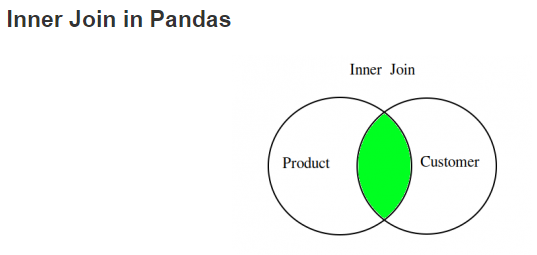

In [19]:
pd.merge(prod,cust,left_on='Product_ID',right_on='Product_ID')
#pd.merge(prod,cust,on='Product_ID')

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,101,Watch,Fashion,299.0,Delhi,1,Olivia,20,Watch,Mumbai
1,103,Shoes,Fashion,2999.0,Chennai,5,Dominic,30,Shoes,Chennai
2,104,Smartphone,Electronics,14999.0,Kolkata,6,Tyler,65,Smartphone,Delhi
3,106,Oil,Grocery,110.0,Chennai,3,Cory,15,Oil,Bangalore
4,107,Laptop,Electronics,79999.0,Bengalore,9,Jeremy,23,Laptop,Mumbai


#### If the names of the columns between dataframes aren't the same you specify the fields to join on from each DataFrame using `left_on` and `right_on`

## Joining `prod` and `cust` using `join()`

[join() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)

#### Note: when using `join()` we need to set the index for each dataframe to be the field(s) we want to join on

# Q2: Which products were bought and sold in the same city?
>- Here, we need to match on `Product_ID` and the city fields (City, Seller_City)

In [21]:
pd.merge(prod,cust,left_on=['Product_ID', 'Seller_City'],right_on=['Product_ID','City'])

,Product_ID,Product_name,Category,Price,Seller_City,id,name,age,Purchased_Product,City
0,103,Shoes,Fashion,2999.0,Chennai,5,Dominic,30,Shoes,Chennai


#### Using `join()` you set a multi-index

In [23]:
keyed_prod = prod.set_index(['Product_ID', 'Seller_City'])
keyed_prod

,,Product_name,Category,Price
Product_ID,Seller_City,,,
101,Delhi,Watch,Fashion,299.0
102,Mumbai,Bag,Fashion,1350.5
103,Chennai,Shoes,Fashion,2999.0
104,Kolkata,Smartphone,Electronics,14999.0
105,Delhi,Books,Study,145.0
106,Chennai,Oil,Grocery,110.0
107,Bengalore,Laptop,Electronics,79999.0


In [24]:
keyed_cust = cust.set_index(['Product_ID', 'City'])
keyed_cust

id     name  age Purchased_Product
Product_ID City                                         
101        Mumbai      1   Olivia   20             Watch
0          Delhi       2   Aditya   25                NA
106        Bangalore   3     Cory   15               Oil
0          Chennai     4  Isabell   10                NA
103        Chennai     5  Dominic   30             Shoes
104        Delhi       6    Tyler   65        Smartphone
0          Kolkata     7   Samuel   35                NA
           Delhi       8   Daniel   18                NA
107        Mumbai      9   Jeremy   23            Laptop

In [37]:
keyed_prod.join(keyed_cust, how='left', lsuffix="PROD_", rsuffix="CUST_")

,,,Product_name,Category,Price,id,name,age,Purchased_Product
Product_ID,Seller_City,City,,,,,,,
101,Delhi,Mumbai,Watch,Fashion,299.0,1.0,Olivia,20.0,Watch
102,Mumbai,NaN,Bag,Fashion,1350.5,NaN,NaN,NaN,NaN
103,Chennai,Chennai,Shoes,Fashion,2999.0,5.0,Dominic,30.0,Shoes
104,Kolkata,Delhi,Smartphone,Electronics,14999.0,6.0,Tyler,65.0,Smartphone
105,Delhi,NaN,Books,Study,145.0,NaN,NaN,NaN,NaN
106,Chennai,Bangalore,Oil,Grocery,110.0,3.0,Cory,15.0,Oil
107,Bengalore,Mumbai,Laptop,Electronics,79999.0,9.0,Jeremy,23.0,Laptop


# Q3: What are all the products we have sold?
>- Include information about customers if we have it

Note: because we want all the products we have sold regardless if you have customer information this is a clue that we should use a `LEFT JOIN` where `prod` is the left table and `cust` is the right table

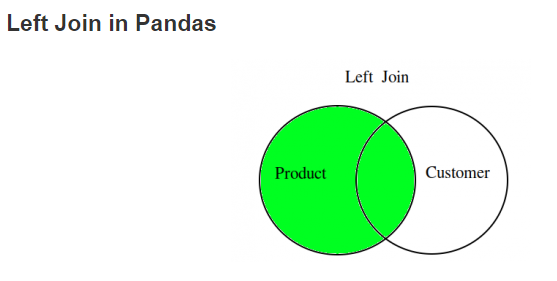

### Note: The 'NaN' values indicate where there wasn't a match found on Product_ID in the right table (cust)

merge() also has the `indicator=True` option to show us where the tables match

# Q3 Follow-up question
## Which products have we sold but do not have customer info on?
>- Check your previous results to answer this question
>- Enter your answer in the next cell by selecting those values from the `q3df`
>>- Use `loc`, `where()`, etc to only show the products requested
>>- Try finding the values using the `Product_ID`'s as well as output from the `_merge` column

# Q4/task:
### Use a `FULL OUTER JOIN` to show data from both tables regardless if there are matches
>- FULL OUTER JOIN shows the data from both tables and will show null values where there isn't a match found
>- This will allow us to see all the products that were sold regardless if we have customer information as well as all information on customers regardless if they have a purchase or not
>- We will use `indicator=True` to show us where the data is

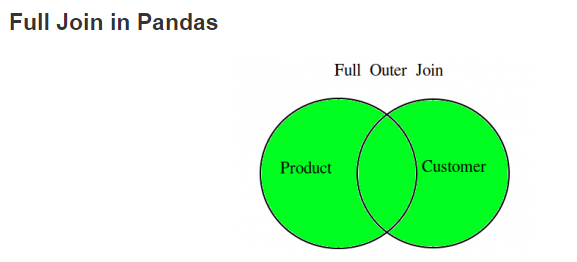